Found 107 images
Batch size: 3


Infant age in months: 0


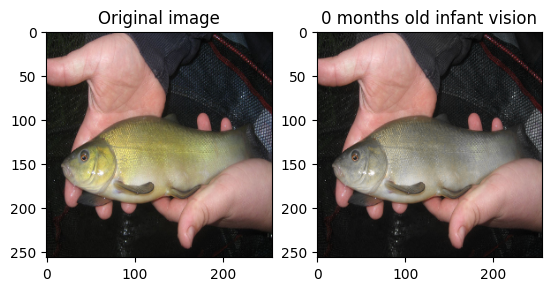

Average loading time: 13.312654654184977


Infant age in months: 1


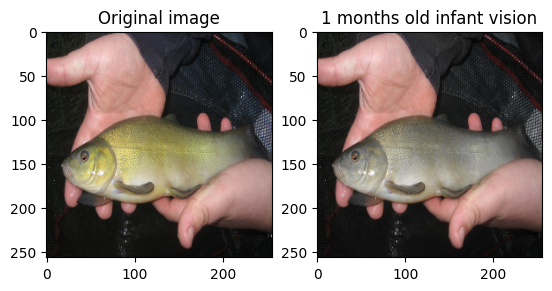

Average loading time: 13.833896239598593


Infant age in months: 2


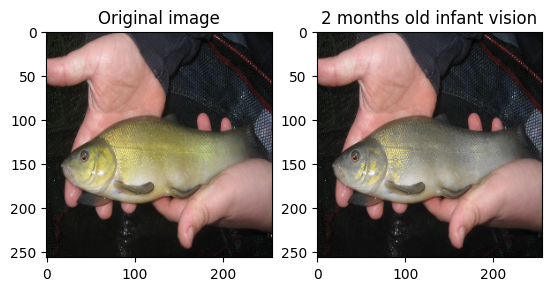

Average loading time: 14.03011155128479


Infant age in months: 3


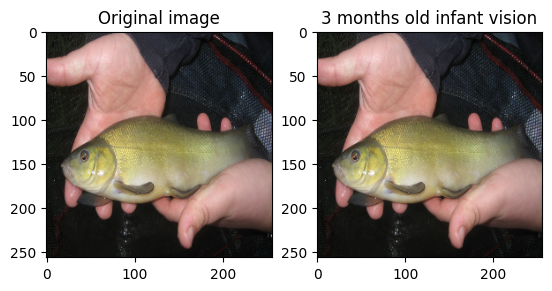

Average loading time: 0.9829191366831461


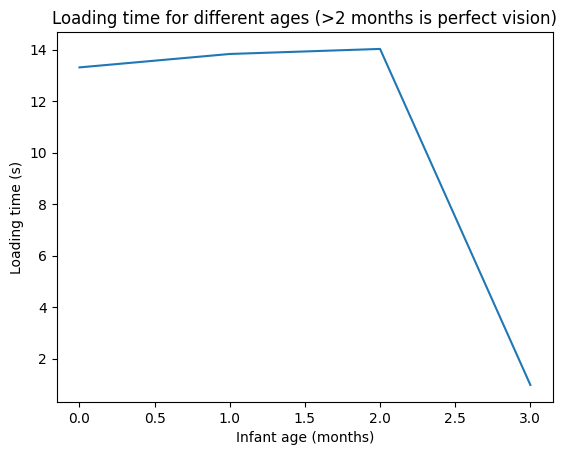

In [ ]:
"""Script to debug dataloader
for different infant ages vs adult vision"""
import torch as t
from data_demo import CustomDataset
from matplotlib import pyplot as plt
import time

train_dataset = CustomDataset(data_type="jpeg", mode="train")
batch_size = 3
print("Batch size:", batch_size)
loading_times = []
for infant_age in range(4):
    train_dataset.infant_age = infant_age
    print("\n\nInfant age in months:", train_dataset.infant_age)

    train_dl = t.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        drop_last=True,
        shuffle=False,
        num_workers=1,
    )

    loading_start_time = time.time()
    (orig_x, x, y) = next(iter(train_dl))
    current_time = time.time()
    average_loading_time = (current_time - loading_start_time) / batch_size
    loading_times.append(average_loading_time)
    
    plt.figure()
    plt.subplot(1, 2, 1).set_title("Original image")
    plt.imshow(orig_x[0].permute(1, 2, 0))
    plt.subplot(1, 2, 2).set_title(
        f"{train_dataset.infant_age} months old infant vision"
    )
    plt.imshow(x[0].permute(1, 2, 0))
    plt.show()

    print("Average loading time:", average_loading_time)
plt.figure()
plt.plot(loading_times)
plt.title("Loading time for different ages (>2 months is perfect vision)")
plt.xlabel("Infant age (months)")
plt.ylabel("Loading time (s)")
plt.show()